<div class="alert alert-block alert-success">
    <h1 align="center">Neural Network </h1>
    <h3 align="center">...Implementing a one layer neural network...</h3>
    <h4 align="center">Omid asadi</a></h5>
</div>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import time
plt.rcParams['figure.figsize'] = (15,5)

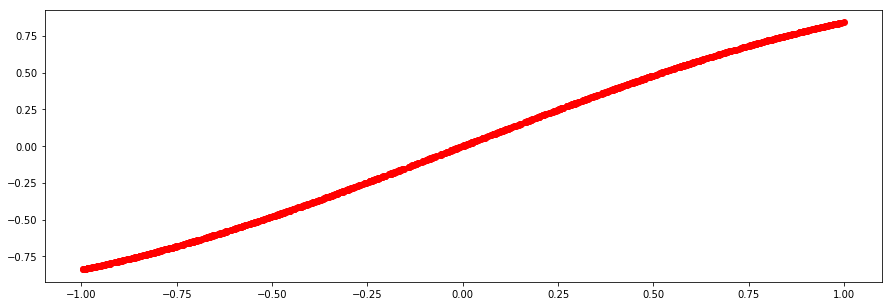

In [29]:
n_feature  = 1
n_sample   = 1000
n_train    = 700
n_test     = 300
epoch      = 50
n_out      = 1
n_neurons  = 5
lr = 0.001

X=np.random.random([n_sample,n_feature])*2-1
y=np.sin(X[:,0])

x_train = X[:n_train,:]
y_train = y[:n_train,None]
x_test  = X[n_train:,:]
y_test  = y[n_train:,None]

plt.plot(X[:,0],y,'or')
plt.show()

In [30]:
#Variable initialization
inputlayer_neurons  = X.shape[1]
hiddenlayer_neurons = 5
output_neurons      = 1
 
#weight and bias initialization
w0_1 = np.random.uniform(size= (inputlayer_neurons,hiddenlayer_neurons))*2-1
b0_1 = np.random.uniform(size= (1,hiddenlayer_neurons))*2-1
w1_2 = np.random.uniform(size= (hiddenlayer_neurons,output_neurons))*2-1
b1_2 = np.random.uniform(size= (1,output_neurons))*2-1

In [31]:
#Sigmoid Function
def sigmoid(x, derivative=False):
    if (derivative == True):
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))
#==============================================

#Tanh Function
def tanh(x, derivative=False):
    if (derivative == True):
        return (1 - (x ** 2))
    return np.tanh(x)
#==============================================

#ReLu Function
def relu(x, derivative=False):
    if (derivative == True):
        for i in range(0, len(x)):
            for k in range(len(x[i])):
                if x[i][k] > 0:
                    x[i][k] = 1
                else:
                    x[i][k] = 0
        return x
    for i in range(0, len(x)):
        for k in range(0, len(x[i])):
            if x[i][k] > 0:
                pass  # do nothing since it would be effectively replacing x with x
            else:
                x[i][k] = 0
    return x
#==============================================

#Leaky Relu Function
def leaky_relu(x):
    return (np.where(x > 0, x, x * 0.01))                          

#Derivative of Leaky Relu
def derivatives_leaky_relu(x):
    dx = np.ones_like(x)
    dx[x < 0] = 0.01
    return dx
#==============================================

#Linear Function
def linear (x, derivative = False):
    if (derivative == True):
        return 1
    return x

Error:0.024438811441521043
Error:0.006852752811180906
Error:0.004807748065567315
Error:0.003747385489573569
Error:0.002968662558442566


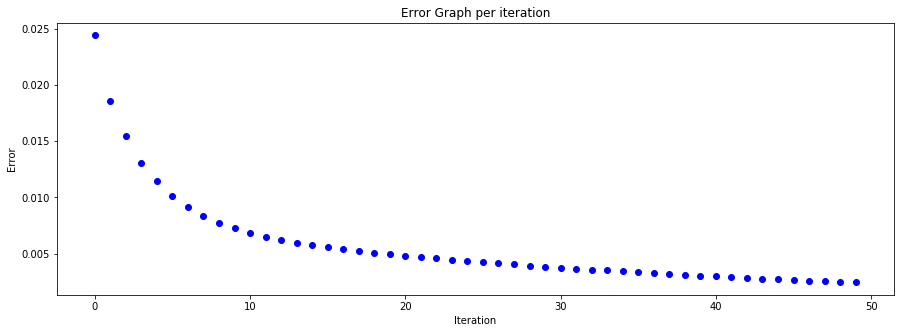

In [32]:
for i in range(epoch):

    #Forward Propagation =============================================
    x_train   #out0 or our input features ;D
    
    pre_out1 = np.dot(x_train,w0_1) + b0_1
    out1     = tanh(pre_out1)
    
    pre_out2 = np.dot(out1,w1_2) + b1_2
    out2     = linear(pre_out2)
    
    #Back propagation ==================================================
    E_out2 = y_train - out2
    
    if (i% 10) == 0:
        print ("Error:" + str(np.mean(np.square(E_out2))))   #print in every 10 iterations.
        
    out2_delta = E_out2 * linear(out2,derivative=True)
    
    E_out1     = out2_delta.dot(w1_2.T)
    out1_delta = E_out1 * tanh(out1,derivative=True)
    
    w1_2 += out1.T.dot(out2_delta) *lr
    w0_1 += x_train.T.dot(out1_delta) *lr
    b1_2 += np.sum(out2_delta, axis=0,keepdims=True) *lr
    b0_1 += np.sum(out1_delta, axis=0,keepdims=True) *lr
    
    plt.plot(i,np.mean(np.mean(np.square(E_out2))),'bo')
    plt.title('Error Graph per iteration')
    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.draw()

In [33]:
x_test   #out0 or our input features ;D
    
pre_out1_test = np.dot(x_test,w0_1) + b0_1
out1_test     = tanh(pre_out1_test)
    
pre_out2_test = np.dot(out1_test,w1_2) + b1_2
out2_test     = linear(pre_out2_test)

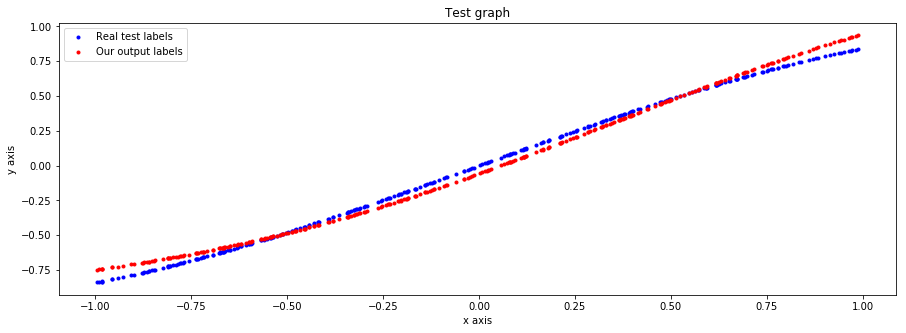

In [34]:
plt.figure(figsize=[15,5])
plt.title('Test graph')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.plot(x_test,y_test,'b.',label="Real test labels")
plt.plot(x_test,out2_test,'r.',label="Our output labels")
plt.legend()
plt.show()